<a href="https://colab.research.google.com/github/OrJaku/dw_matix/blob/master/day2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade tables
!pip install eli5

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)
     |████████████████████████████████| 112kB 2.8MB/s 


In [3]:
cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [4]:
cd dw_matrix_2/dw_matix/transformacja_2/

/content/drive/My Drive/Colab Notebooks/dw_matrix_2/dw_matix/transformacja_2


## Day 2

In [0]:
df = pd.read_hdf('data/car.h5')

In [5]:
df.shape

(106494, 155)

In [10]:
df.price_value.value_counts()

19900.0     1417
16900.0     1224
9900.0      1224
15900.0     1209
14900.0     1186
            ... 
53740.0        1
7550.0         1
247730.0       1
182200.0       1
114690.0       1
Name: price_value, Length: 7821, dtype: int64

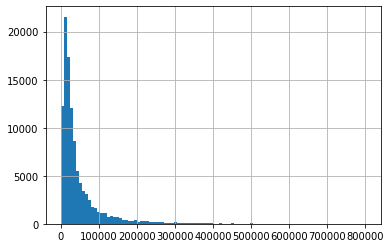

In [7]:
df['price_value'].hist(bins=100)

In [11]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [0]:
def group(feat_groupby, feat_sort,feat_agg='price_value', agg_func=[np.mean, np.median, np.size]):
  return (
      df
      .groupby(feat_groupby)[feat_agg]
      .agg(agg_func)
      .sort_values(by=feat_sort, ascending=False)
      .head(60)
      
  ).plot(kind="bar", figsize=(20,5), subplots=True)


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fded7d2f4a8>,
      dtype=object)

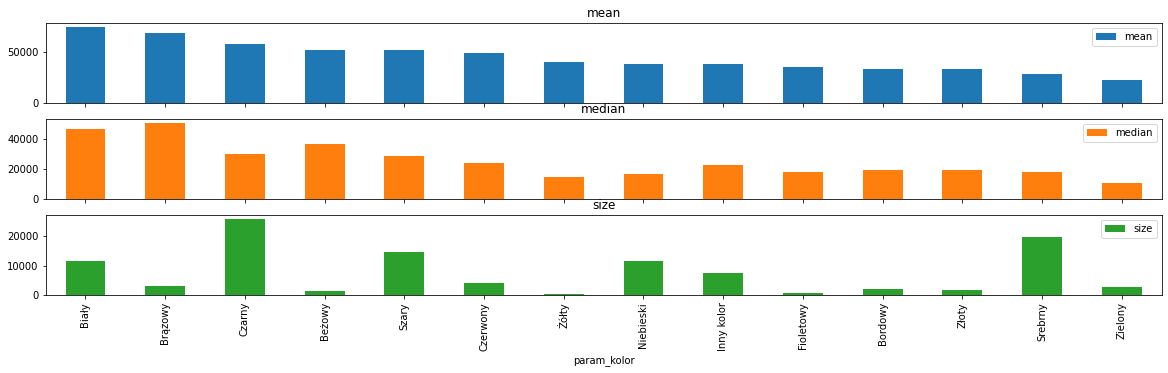

In [56]:
group('param_kolor', 'mean')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fded7b9c8d0>,
      dtype=object)

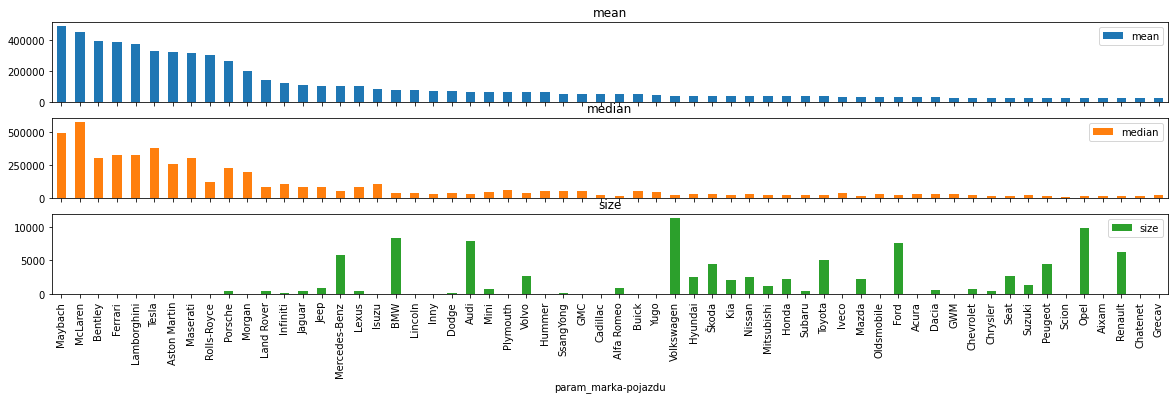

In [58]:
group('param_marka-pojazdu', 'mean')

## Day 3

In [0]:
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score
from eli5.sklearn import PermutationImportance
import eli5



Wczytywanie danych

In [66]:
df = pd.read_hdf('data/car.h5')
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

Dummy model

In [105]:
feats = ['car_id']
df= df[df['price_currency'] != 'EUR' ]
x = df[ feats ].values
y= df['price_value'].values


model = DummyRegressor()
model.fit(x, y)
y_pred = model.predict(x)
mae(y, y_pred)


39456.885927541574

Features

In [94]:
df['param_color'].factorize()[0]

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CUT = "__cut"
for feat in df.columns:
  if isinstance(df[feat][0], list): continue
  factor_val =  df[feat].factorize()[0]
  if SUFFIX_CUT in feat:
    df[feat] = factor_val
  else:
    df[feat + SUFFIX_CUT] = factor_val

In [117]:
cat_feats = [x for x in df.columns if SUFFIX_CUT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]

len(cat_feats)

151

In [135]:
A = df[cat_feats].values
B = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
score = cross_val_score(model, A, B, cv=3, scoring='neg_mean_absolute_error')
np.mean(score)

-19650.45289201444

In [139]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(A,B)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.1956 ± 0.0054,param_faktura-vat__cut
0.1903 ± 0.0027,param_napęd__cut
0.1815 ± 0.0087,param_stan__cut
0.1512 ± 0.0078,param_rok-produkcji__cut
0.0928 ± 0.0019,param_skrzynia-biegów__cut
0.0607 ± 0.0051,param_moc__cut
0.0436 ± 0.0015,feature_kamera-cofania__cut
0.0191 ± 0.0022,param_pojemność-skokowa__cut
0.0162 ± 0.0004,feature_bluetooth__cut
0.0110 ± 0.0007,feature_łopatki-zmiany-biegów__cut


## Day 4 


In [123]:
!pip install xgboost

In [0]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [0]:
def run_model(model, feats):
  X = df[feats].values
  y = df['price_value'].values

  score = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
  return np.mean(score), np.std(score)
  

## Decision Tree

In [138]:
run_model(DecisionTreeRegressor(max_depth=5), cat_feats)


(-19650.45289201444, 72.79949702628514)

## Random Forest

In [140]:
model_RFR = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=0) 
run_model(model_RFR ,cat_feats)

(-18888.885229877447, 52.00741669248174)

## XGBoost

In [141]:
xgb_params = {
    'max_depth': 5,
    'n_estimators': 50,
    'learning_rate': 0.1,
    'seed': 0
}

model_XGB = xgb.XGBRegressor(**xgb_params) 
run_model(model_XGB ,cat_feats)

[15:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:12:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-13011.117848647147, 66.77416696652178)

In [142]:
m = xgb.XGBRegressor(**xgb_params)
m.fit(A,B)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=cat_feats)

[15:16:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Weight,Feature
0.1286 ± 0.0010,param_napęd__cut
0.1113 ± 0.0031,param_rok-produkcji__cut
0.1026 ± 0.0020,param_stan__cut
0.0597 ± 0.0021,param_faktura-vat__cut
0.0523 ± 0.0018,param_moc__cut
0.0440 ± 0.0015,param_skrzynia-biegów__cut
0.0277 ± 0.0005,feature_kamera-cofania__cut
0.0243 ± 0.0007,param_marka-pojazdu__cut
0.0241 ± 0.0004,param_typ__cut
0.0167 ± 0.0007,param_pojemność-skokowa__cut


In [0]:
feats = [
'param_napęd__cut',
'param_rok-produkcji__cut',
'param_stan__cut',
'param_faktura-vat__cut',
'param_moc__cut',
'param_skrzynia-biegów__cut',
'feature_kamera-cofania__cut',
'param_marka-pojazdu__cut',
'param_typ__cut',
'param_pojemność-skokowa__cut',
'feature_wspomaganie-kierownicy__cut',
'seller_name__cut',
'param_wersja__cut',
'param_model-pojazdu__cut',
'feature_światła-led__cut',
'feature_asystent-pasa-ruchu__cut',
'param_kod-silnika__cut',
'feature_system-start-stop__cut',
'feature_regulowane-zawieszenie__cut',
'feature_łopatki-zmiany-biegów__cut',
]

In [145]:
run_model(model_XGB ,feats)

[15:28:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-13574.091621784022, 118.63492342760455)

In [147]:
df['param_rok-produkcji'].unique()

array(['2018', '2011', '2015', '2009', '2017', '2012', '2013', '2007',
       '2001', '2016', '2006', '2008', '2004', '1999', '2000', '2010',
       '2005', '2002', '1998', '2014', '2003', '1982', '1995', '1997',
       '1992', '1993', '1994', '1996', '1989', '1988', '1967', '1987',
       '1959', '1990', '1991', '1974', None, '1975', '1973', '1985',
       '1984', '1986', '1981', '1979', '1960', '1983', '1978', '1964',
       '1980', '1972', '1969', '1956', '1966', '1977', '1971', '1963',
       '1953', '1961', '1952', '1949', '1976', '1965', '1937', '1968',
       '1958', '1962', '1955', '1970', '1933', '1929', '1957', '1944',
       '1954', '1932', '1936', '1947', '1948'], dtype=object)

In [149]:
df['param_rok-produkcji__cut'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76])

0         2018
2         2011
3         2015
4         2009
5         2017
          ... 
160609    2013
160610    2013
160611    2006
160614    2003
160615    2006
Name: param_rok-produkcji, Length: 106290, dtype: int64

In [0]:
df['param_rok-produkcji'] = df['param_rok-produkcji'].map(lambda x: -1 if str(x) == "None" else int(x))

df['param_moc'] = df['param_moc'].map(lambda x: -1 if str(x) == "None" else int(x.split(' ')[0]) 

df['param_pojemność-skokowa'] = df['param_pojemność-skokowa'].map(lambda x: -1 if str(x) == "None" else int(x.split('cm' )[0].replace(" ", "")) )

In [179]:
feats_2 = [
'param_napęd__cut',
'param_rok-produkcji',
'param_stan__cut',
'param_faktura-vat__cut',
'param_moc',
'param_skrzynia-biegów__cut',
'feature_kamera-cofania__cut',
'param_marka-pojazdu__cut',
'param_typ__cut',
'param_pojemność-skokowa',
'feature_wspomaganie-kierownicy__cut',
'seller_name__cut',
'param_wersja__cut',
'param_model-pojazdu__cut',
'feature_światła-led__cut',
'feature_asystent-pasa-ruchu__cut',
'param_kod-silnika__cut',
'feature_system-start-stop__cut',
'feature_regulowane-zawieszenie__cut',
'feature_łopatki-zmiany-biegów__cut',
]

xgb_params = {
    'max_depth': 5,
    'n_estimators': 50,
    'learning_rate': 0.1,
    'seed': 0
}

model_XGB = xgb.XGBRegressor(**xgb_params)

run_model(model_XGB ,feats_2)

[15:59:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-9509.820293249251, 76.9604876165551)

In [0]:
df['param_moc'].unique()

In [177]:
df['param_pojemność-skokowa'].head()

0      898 cm3
2    1 560 cm3
3    3 000 cm3
4    1 560 cm3
5    1 984 cm3
Name: param_pojemność-skokowa, dtype: object

## Day 5

In [0]:
!pip install hyperopt

In [0]:
from hyperopt import hp, fmin, tpe, STATUS_OK

In [183]:
feats_2 = [
'param_napęd__cut',
'param_rok-produkcji',
'param_stan__cut',
'param_faktura-vat__cut',
'param_moc',
'param_skrzynia-biegów__cut',
'feature_kamera-cofania__cut',
'param_marka-pojazdu__cut',
'param_typ__cut',
'param_pojemność-skokowa',
'feature_wspomaganie-kierownicy__cut',
'seller_name__cut',
'param_wersja__cut',
'param_model-pojazdu__cut',
'feature_światła-led__cut',
'feature_asystent-pasa-ruchu__cut',
'param_kod-silnika__cut',
'feature_system-start-stop__cut',
'feature_regulowane-zawieszenie__cut',
'feature_łopatki-zmiany-biegów__cut',
]

xgb_params = {
    'max_depth': 5,
    'n_estimators': 50,
    'learning_rate': 0.1,
    'seed': 0
}

model_XGB = xgb.XGBRegressor(**params)

run_model(model_XGB ,feats_2)

[16:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(-9509.820293249251, 76.9604876165551)

In [0]:
def obj_func(params):
  print("Training with params: ", params)

  model_XGB = xgb.XGBRegressor(**params)

  mean_mae, score_std = run_model(model_XGB ,feats_2)

  return {'loss': np.abs(mean_mae), 'status': STATUS_OK}

xgb_reg_params = {
    'learning_rate': hp.choice('learning_rate', np. arange(0.05, 0.31, 0.05)),
    'max_depth': hp.choice('max_depth', np.arange(5, 16, 1, dtype=int)),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'seed': 0,
} 


best = fmin(obj_func, xgb_reg_params, algo=tpe.suggest, max_evals=25)



Training with params: 
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.8}
Training with params: 
{'colsample_bytree': 0.7000000000000001, 'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.8500000000000001}
Training with params: 
{'colsample_bytree': 0.65, 'learning_rate': 0.15000000000000002, 'max_depth': 7, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.65}
Training with params: 
{'colsample_bytree': 0.8500000000000001, 'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.65}
Training with params: 
{'colsample_bytree': 0.65, 'learning_rate': 0.2, 'max_depth': 12, 'n_estimators': 100, 'objective': 'reg:squarederror', 'seed': 0, 'subsample': 0.75}
Training with params: 
{'colsample_bytree': 0.55, 'learning_rate':

In [5]:
pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix_2/dw_matix/transformacja_2'

In [6]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   Init.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	day2_2.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [0]:
!git add . 

In [10]:
!git commit -m"Add file day2_2 including all tranformation days"

[master 6a66fd0] Add file day2_2 including all tranformation days
 2 files changed, 2 insertions(+), 1 deletion(-)
 rewrite transformacja_2/Init.ipynb (80%)
 create mode 100644 transformacja_2/day2_2.ipynb


In [0]:
!git config --global user.email "kuba.orzel@hotmail.com"
!git config --global user.name "OrJaku"

In [13]:
!git pull

Already up to date.
